In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/HR_Dataset.csv")
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [ ]:
df1 = df1.drop_duplicates()
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [ ]:
df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
       'RandD':'5', 'IT':'6', 'marketing':'7', 'hr':'8', 'accounting':'9'})
df1['Departments '] = df1['Departments '].astype('float')

<ipython-input-13-4087c2fed31c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
<ipython-input-13-4087c2fed31c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments '] = df1['Departments '].astype('float')


In [ ]:
df1['salary']= df1['salary'].replace({'low':'0', 'medium':'1', 'high':'2'})
df1['salary'] = df1['salary'].astype('float')

<ipython-input-14-dc2f1cd28f24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary']= df1['salary'].replace({'low':'0', 'medium':'1', 'high':'2'})
<ipython-input-14-dc2f1cd28f24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = df1['salary'].astype('float')


In [ ]:
df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments              float64
salary                   float64
dtype: object

In [ ]:
# normal fitting

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

x1 = df1.drop('left', axis=1)
y1 = df1['left']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x1_train, y1_train)
y1_pred = dt_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9674864526886202
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2012
           1       0.90      0.90      0.90       387

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
from scipy import stats

z_scores = stats.zscore(df1)
threshold = 2
outliers = (z_scores > threshold).all(axis=1)
df10 = df1[~outliers]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

x10 = df10.drop('left', axis=1)
y10 = df10['left']

x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, test_size=0.2)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x10_train, y10_train)
y10_pred = dt_classifier.predict(x10_test)

accuracy = accuracy_score(y10_test, y10_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y10_test, y10_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9670696123384743
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2018
           1       0.90      0.90      0.90       381

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
#using cost complexity

dtp_classifier = DecisionTreeClassifier(ccp_alpha=0.01)
dtp_classifier.fit(x1_train, y1_train)
y1_pred_p = dtp_classifier.predict(x1_test)

accuracy_p = accuracy_score(y1_test, y1_pred_p)
print(f"Accuracy: {accuracy_p}")
classification_rep = classification_report(y1_test, y1_pred_p)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9749895789912464
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2027
           1       0.91      0.93      0.92       372

    accuracy                           0.97      2399
   macro avg       0.95      0.96      0.95      2399
weighted avg       0.98      0.97      0.98      2399



In [ ]:
dts_classifier = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
dts_classifier.fit(x1_train, y1_train)
y1_pred_s = dtp_classifier.predict(x1_test)

accuracy_s = accuracy_score(y1_test, y1_pred_s)
print(f"Accuracy: {accuracy_s}")
classification_rep = classification_report(y1_test, y1_pred_s)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9749895789912464
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2027
           1       0.91      0.93      0.92       372

    accuracy                           0.97      2399
   macro avg       0.95      0.96      0.95      2399
weighted avg       0.98      0.97      0.98      2399



In [ ]:
dtd_classifier = DecisionTreeClassifier(max_depth=5)
dtd_classifier.fit(x1_train, y1_train)
y1_pred_d = dtp_classifier.predict(x1_test)

accuracy_d = accuracy_score(y1_test, y1_pred_d)
print(f"Accuracy: {accuracy_d}")
classification_rep = classification_report(y1_test, y1_pred_d)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9749895789912464
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2027
           1       0.91      0.93      0.92       372

    accuracy                           0.97      2399
   macro avg       0.95      0.96      0.95      2399
weighted avg       0.98      0.97      0.98      2399



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x1_train, y1_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_resampled, y_resampled)

y_pred_re = dt_classifier.predict(x1_test)
accuracy = accuracy_score(y1_test, y_pred_re)
classification_rep = classification_report(y1_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.9233013755731555
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2027
           1       0.68      0.95      0.79       372

    accuracy                           0.92      2399
   macro avg       0.84      0.93      0.87      2399
weighted avg       0.94      0.92      0.93      2399



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x1_resampled, y1_resampled = smote.fit_resample(x1_train, y1_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x1_resampled, y1_resampled)
y1_pred_sam = dt_classifier.predict(x1_test)
accuracy_sam = accuracy_score(y1_test, y1_pred_sam)
classification_rep = classification_report(y1_test, y1_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9549812421842434
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2027
           1       0.80      0.95      0.87       372

    accuracy                           0.95      2399
   macro avg       0.89      0.95      0.92      2399
weighted avg       0.96      0.95      0.96      2399



In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x1_resampled, y1_resampled = oversampler.fit_resample(x1_train, y1_train)

dt_classifier.fit(x1_resampled, y1_resampled)
y1_pred = dt_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y1_test, y1_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2027
           1       0.89      0.93      0.91       372

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x1_train, y1_train)
y_pred_rf = random_forest_classifier.predict(x1_test)
accuracy_rf = accuracy_score(y1_test, y_pred_rf)
classification_rep_rf = classification_report(y1_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')

Random Forest Accuracy: 0.988328470195915
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2027
           1       0.99      0.94      0.96       372

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x1_train, y1_train)
y_pred_adaboost = adaboost_classifier.predict(x1_test)
accuracy_adaboost = accuracy_score(y1_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y1_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')


AdaBoost Accuracy: 0.9679032930387661
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2027
           1       0.86      0.94      0.90       372

    accuracy                           0.97      2399
   macro avg       0.93      0.96      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=dt_classifier,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x1_train, y1_train)
y_pred_bagging = bagging_model.predict(x1_test)
accuracy_bagging = accuracy_score(y1_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y1_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy with Bagging: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2027
           1       0.98      0.94      0.96       372

    accuracy                           0.99      2399
   macro avg       0.98      0.97      0.97      2399
weighted avg       0.99      0.99      0.99      2399



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_splits_values = np.arange(5,50)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x1, y1, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x1, y1, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(dt_classifier, x1, y1, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))


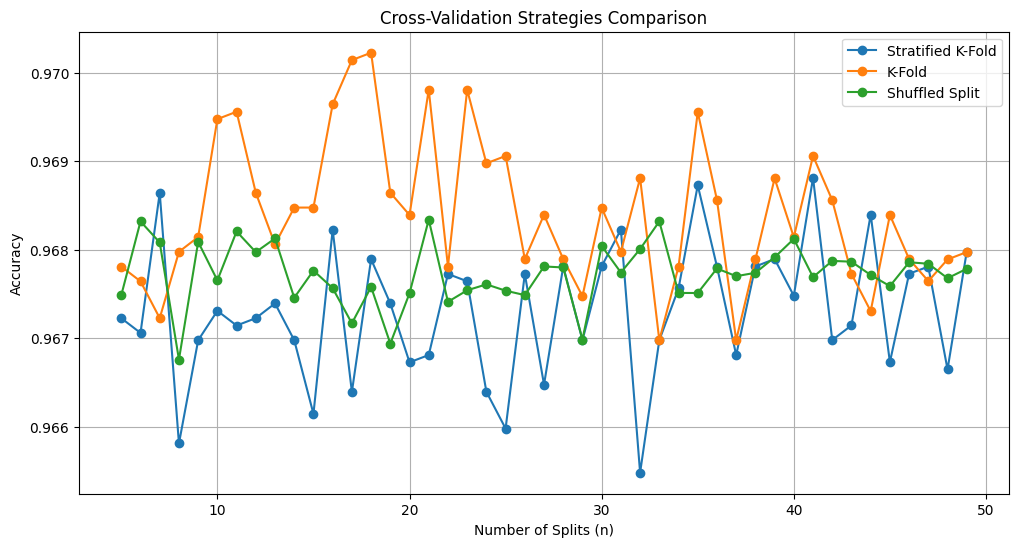

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df2 = pd.read_csv("/content/dataset4.csv")
df2

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df2.isnull().sum()

Unnamed: 0                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [ ]:
df2.dtypes

Unnamed: 0                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

In [ ]:
print(df2['Over18'].unique())
print(df2['OverTime'].unique())
print(df2['JobRole'].unique())
print(df2['MaritalStatus'].unique())
print(df2['Attrition'].unique())
print(df2['BusinessTravel'].unique())
print(df2['Department'].unique())
print(df2['EducationField'].unique())
print(df2['Gender'].unique())

['Y']
['Yes' 'No']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']


In [ ]:
df2['Over18']= df2['Over18'].replace({'Y':'0'})
df2['OverTime'] = df2['OverTime'].replace({'Yes':'1','No':'0'})
df2['JobRole'] = df2['JobRole'].replace({'Sales Executive':'0','Research Scientist':'1','Laboratory Technician':'2',
 'Manufacturing Director':'3','Healthcare Representative':'4','Manager':'5',
 'Sales Representative':'6','Research Director':'7', 'Human Resources':'8'})
df2['MaritalStatus'] = df2['MaritalStatus'].replace({'Single':'0','Married':'1','Divorced':'2'})
df2['Attrition'] = df2['Attrition'].replace({'Yes':'1','No':'0'})
df2['BusinessTravel'] = df2['BusinessTravel'].replace({'Travel_Rarely':'0','Travel_Frequently':'1','Non-Travel':'2'})
df2['Department'] = df2['Department'].replace({'Sales':'0','Research & Development':'1','Human Resources':'2'})
df2['EducationField'] = df2['EducationField'].replace({'Life Sciences':'0','Medical':'1','Marketing':'2','Technical Degree':'3','Human Resources':'4','Other':'5'})
df2['Gender'] = df2['Gender'].replace({'Female':'0','Male':'1'})


In [ ]:
df2['Over18']= df2['Over18'].astype('int')
df2['OverTime']=df2['OverTime'].astype('int')
df2['JobRole']= df2['JobRole'].astype('int')
df2['MaritalStatus']= df2['MaritalStatus'].astype('int')
df2['Attrition'] = df2['Attrition'].astype('int')
df2['BusinessTravel'] = df2['BusinessTravel'].astype('int')
df2['Department'] = df2['Department'].astype('int')
df2['EducationField'] = df2['EducationField'].astype('int')
df2['Gender'] = df2['Gender'].astype('int')

In [ ]:
df2 = df2.iloc[:,1:]

In [ ]:
df2 = df2.drop_duplicates()
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,0,613,1,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,0,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,0,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

x2 = df2.drop('Attrition', axis=1)
y2 = df2['Attrition']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x2_train, y2_train)
y2_pred = dt_classifier.predict(x2_test)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7687074829931972
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       245
           1       0.33      0.37      0.35        49

    accuracy                           0.77       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.78      0.77      0.77       294



In [ ]:
from scipy import stats

z_scores = stats.zscore(df2)
threshold = 2
outliers = (z_scores > threshold).all(axis=1)
df20 = df2[~outliers]

In [ ]:
x20 = df20.drop('Attrition', axis=1)
y20 = df20['Attrition']

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.2)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x20_train, y20_train)
y20_pred = dt_classifier.predict(x20_test)

accuracy = accuracy_score(y20_test, y20_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y20_test, y20_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7891156462585034
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       251
           1       0.33      0.42      0.37        43

    accuracy                           0.79       294
   macro avg       0.61      0.64      0.62       294
weighted avg       0.81      0.79      0.80       294



In [ ]:
dtp_classifier = DecisionTreeClassifier(ccp_alpha=0.01)
dtp_classifier.fit(x2_train, y2_train)
y2_pred_p = dtp_classifier.predict(x2_test)

accuracy_p = accuracy_score(y2_test, y2_pred_p)
print(f"Accuracy: {accuracy_p}")
classification_rep = classification_report(y2_test, y2_pred_p)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.71      0.24      0.36        49

    accuracy                           0.86       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294



In [ ]:
dts_classifier = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
dts_classifier.fit(x2_train, y2_train)
y2_pred_s = dtp_classifier.predict(x2_test)

accuracy_s = accuracy_score(y2_test, y2_pred_s)
print(f"Accuracy: {accuracy_s}")
classification_rep = classification_report(y2_test, y2_pred_s)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



In [ ]:
dtd_classifier = DecisionTreeClassifier(max_depth=5)
dtd_classifier.fit(x2_train, y2_train)
y2_pred_d = dtp_classifier.predict(x2_test)

accuracy_d = accuracy_score(y2_test, y2_pred_d)
print(f"Accuracy: {accuracy_d}")
classification_rep = classification_report(y2_test, y2_pred_d)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x2_train, y2_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_resampled, y_resampled)

y_pred_re = dt_classifier.predict(x2_test)
accuracy = accuracy_score(y2_test, y_pred_re)
classification_rep = classification_report(y2_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6394557823129252
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       245
           1       0.24      0.55      0.34        49

    accuracy                           0.64       294
   macro avg       0.56      0.60      0.54       294
weighted avg       0.77      0.64      0.68       294



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x2_resampled, y2_resampled = smote.fit_resample(x2_train, y2_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x2_resampled, y2_resampled)
y2_pred_sam = dt_classifier.predict(x2_test)
accuracy_sam = accuracy_score(y2_test, y2_pred_sam)
classification_rep = classification_report(y2_test, y2_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7210884353741497
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       245
           1       0.31      0.55      0.40        49

    accuracy                           0.72       294
   macro avg       0.60      0.65      0.61       294
weighted avg       0.80      0.72      0.75       294



In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x2_resampled, y2_resampled = oversampler.fit_resample(x2_train, y2_train)

dt_classifier.fit(x2_resampled, y2_resampled)
y2_pred = dt_classifier.predict(x2_test)

accuracy = accuracy_score(y2_test, y2_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y2_test, y2_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       245
           1       0.35      0.33      0.34        49

    accuracy                           0.79       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.78      0.79      0.78       294



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x2_train, y2_train)
y_pred_rf = random_forest_classifier.predict(x2_test)
accuracy_rf = accuracy_score(y2_test, y_pred_rf)
classification_rep_rf = classification_report(y2_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')

Random Forest Accuracy: 0.8639455782312925
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       0.91      0.20      0.33        49

    accuracy                           0.86       294
   macro avg       0.89      0.60      0.63       294
weighted avg       0.87      0.86      0.83       294



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x2_train, y2_train)
y_pred_adaboost = adaboost_classifier.predict(x2_test)
accuracy_adaboost = accuracy_score(y2_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y2_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')

AdaBoost Accuracy: 0.7721088435374149
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       245
           1       0.34      0.41      0.37        49

    accuracy                           0.77       294
   macro avg       0.61      0.63      0.62       294
weighted avg       0.79      0.77      0.78       294



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=dt_classifier,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x2_train, y2_train)
y_pred_bagging = bagging_model.predict(x2_test)
accuracy_bagging = accuracy_score(y2_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y2_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

Accuracy with Bagging: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       245
           1       0.61      0.29      0.39        49

    accuracy                           0.85       294
   macro avg       0.74      0.62      0.65       294
weighted avg       0.83      0.85      0.83       294



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


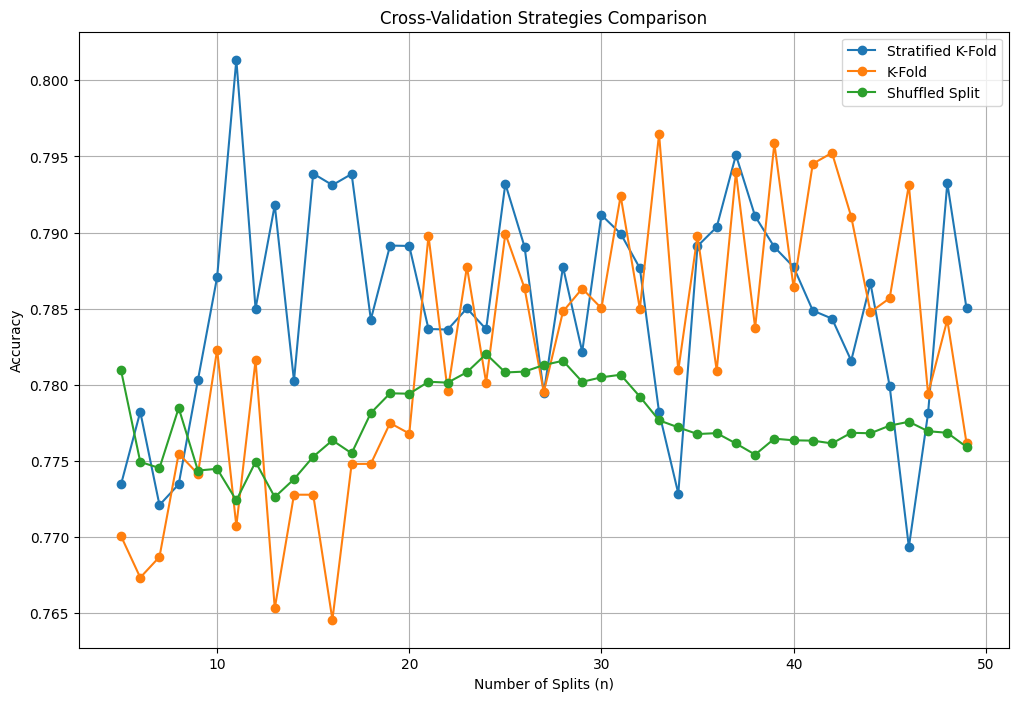

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_splits_values = np.arange(5,50)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x2, y2, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x2, y2, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(dt_classifier, x2, y2, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

df3 = pd.read_csv("/content/Employee.csv")
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
df3 = df3.drop_duplicates()
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [ ]:
df3.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [ ]:
print(df3['Education'].unique())
print(df3['City'].unique())
print(df3['Gender'].unique())
print(df3['EverBenched'].unique())

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'Pune' 'New Delhi']
['Male' 'Female']
['No' 'Yes']


In [ ]:
df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
df3['EverBenched'] = df3['EverBenched'].replace({'No':'0','Yes':'1'})
df3['Gender'] = df3['Gender'].replace({'Female':'0','Male':'1'})

df3['Education']= df3['Education'].astype('int')
df3['City']=df3['City'].astype('int')
df3['Gender']= df3['Gender'].astype('int')
df3['EverBenched']= df3['EverBenched'].astype('int')

df3

<ipython-input-36-766065f16b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
<ipython-input-36-766065f16b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
<ipython-input-36-766065f16b11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,1,2,31,0,0,2,0
4647,0,2016,1,3,30,1,0,2,0
4649,1,2013,1,2,37,1,0,2,1
4650,1,2018,2,3,27,1,0,5,1


In [ ]:
x3 = df3.drop('LeaveOrNot', axis=1)
y3 = df3['LeaveOrNot']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x3_train, y3_train)
y3_pred = dt_classifier.predict(x3_test)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6582278481012658
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       335
           1       0.57      0.57      0.57       218

    accuracy                           0.66       553
   macro avg       0.64      0.64      0.64       553
weighted avg       0.66      0.66      0.66       553



In [ ]:
dtp_classifier = DecisionTreeClassifier(ccp_alpha=0.01)
dtp_classifier.fit(x3_train, y3_train)
y3_pred_p = dtp_classifier.predict(x3_test)

accuracy_p = accuracy_score(y3_test, y3_pred_p)
print(f"Accuracy: {accuracy_p}")
classification_rep = classification_report(y3_test, y3_pred_p)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7522603978300181
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       335
           1       0.87      0.44      0.58       218

    accuracy                           0.75       553
   macro avg       0.80      0.70      0.70       553
weighted avg       0.78      0.75      0.73       553



In [ ]:
dts_classifier = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5)
dts_classifier.fit(x3_train, y3_train)
y3_pred_s = dtp_classifier.predict(x3_test)

accuracy_s = accuracy_score(y3_test, y3_pred_s)
print(f"Accuracy: {accuracy_s}")
classification_rep = classification_report(y3_test, y3_pred_s)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7450271247739603
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       349
           1       0.82      0.39      0.53       204

    accuracy                           0.75       553
   macro avg       0.78      0.67      0.68       553
weighted avg       0.76      0.75      0.72       553



In [ ]:
dtd_classifier = DecisionTreeClassifier(max_depth=5)
dtd_classifier.fit(x3_train, y3_train)
y3_pred_d = dtp_classifier.predict(x3_test)

accuracy_d = accuracy_score(y2_test, y2_pred_d)
print(f"Accuracy: {accuracy_d}")
classification_rep = classification_report(y2_test, y2_pred_d)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x3_train, y3_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_resampled, y_resampled)

y_pred_re = dt_classifier.predict(x3_test)
accuracy = accuracy_score(y3_test, y_pred_re)
classification_rep = classification_report(y3_test, y_pred_re)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6763110307414105
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       335
           1       0.58      0.67      0.62       218

    accuracy                           0.68       553
   macro avg       0.67      0.68      0.67       553
weighted avg       0.69      0.68      0.68       553



In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x3_resampled, y3_resampled = smote.fit_resample(x3_train, y3_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x3_resampled, y3_resampled)
y3_pred_sam = dt_classifier.predict(x3_test)
accuracy_sam = accuracy_score(y3_test, y3_pred_sam)
classification_rep = classification_report(y3_test, y3_pred_sam)
print(f'Accuracy: {accuracy_sam}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6690777576853526
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       335
           1       0.58      0.61      0.59       218

    accuracy                           0.67       553
   macro avg       0.66      0.66      0.66       553
weighted avg       0.67      0.67      0.67       553



In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x3_resampled, y3_resampled = oversampler.fit_resample(x3_train, y3_train)

dt_classifier.fit(x3_resampled, y3_resampled)
y3_pred = dt_classifier.predict(x3_test)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy after Oversampling: {accuracy:.2f}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy after Oversampling: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       335
           1       0.60      0.61      0.60       218

    accuracy                           0.68       553
   macro avg       0.67      0.67      0.67       553
weighted avg       0.68      0.68      0.68       553



In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(x3_train, y3_train)
y_pred_rf = random_forest_classifier.predict(x3_test)
accuracy_rf = accuracy_score(y3_test, y_pred_rf)
classification_rep_rf = classification_report(y3_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')

Random Forest Accuracy: 0.7251356238698011
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       349
           1       0.63      0.60      0.62       204

    accuracy                           0.73       553
   macro avg       0.70      0.70      0.70       553
weighted avg       0.72      0.73      0.72       553



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(dt_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(x3_train, y3_train)
y_pred_adaboost = adaboost_classifier.predict(x3_test)
accuracy_adaboost = accuracy_score(y3_test, y_pred_adaboost)
classification_rep_adaboost = classification_report(y3_test, y_pred_adaboost)

print(f'AdaBoost Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Classification Report:\n{classification_rep_adaboost}')

AdaBoost Accuracy: 0.6889692585895117
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       335
           1       0.61      0.58      0.59       218

    accuracy                           0.69       553
   macro avg       0.67      0.67      0.67       553
weighted avg       0.69      0.69      0.69       553



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=dt_classifier,
                                  n_estimators=10, random_state=42)
bagging_model.fit(x3_train, y3_train)
y_pred_bagging = bagging_model.predict(x3_test)
accuracy_bagging = accuracy_score(y3_test, y_pred_bagging)
print(f"Accuracy with Bagging: {accuracy_bagging:.2f}")
classification_rep = classification_report(y3_test, y_pred_bagging)
print(f'Classification Report:\n{classification_rep}')

Accuracy with Bagging: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       335
           1       0.66      0.62      0.64       218

    accuracy                           0.73       553
   macro avg       0.71      0.71      0.71       553
weighted avg       0.72      0.73      0.73       553



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


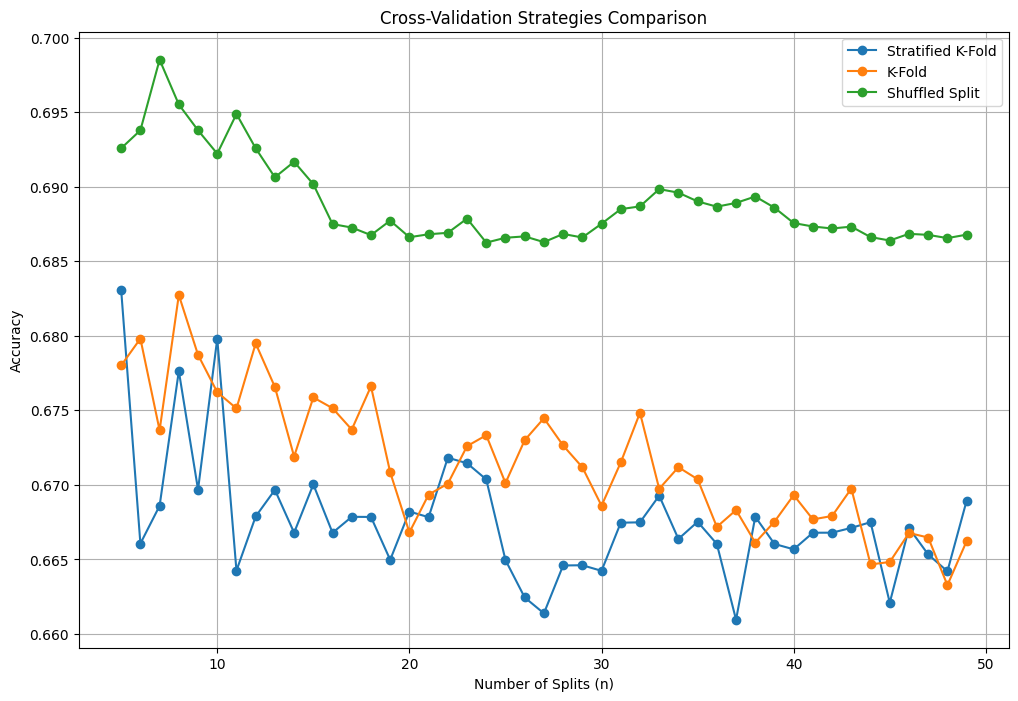

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

n_splits_values = np.arange(5,50)

accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x3, y3, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(dt_classifier, x3, y3, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(dt_classifier, x3, y3, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()